# 들어가기 전에..

- 먼저 준비를 해주신 분들께 박수를. 소감도 같이 들어보죠

<br>

- 데이터 분석에는 정답이 없습니다. 여기있는 예시는 말그대로 예시일뿐.<br>여러분들이 좀더 접근해서 더 좋은 결과를 낼수도 있습니다.

<br>

- 지금은 코드와 알고리즘 부분을 집중해서 보지마세요. <br>데이터를 받은 시점부터 결과를 낼때까지 그 큰 흐름에 집중하세요. 숲을 보고나서 나무와 잎사귀를 파악해야합니다

<br>

- 데이터를 목적에 맞춰 깔끔하게 정리하는것은 그냥 단순한 반복 노가다로 보이지만  아주 중요한 핵심 능력입니다. <br>작업을 하는 매순간마다 목적(왜??)과 결과를 생각하면서 decision making을 해야 합니다.

# 1. 목적 정의

현업에서 데이터를 다루시다 보면

<b>"요구목적이 제대로 정의된 경우는 단 하나도 없다"</b>

라는 현실을 느끼시게 될겁니다.

요구목적 정의라는것은 데이터분석에서 가장 어려운 부분중 하나입니다.

아래는 두분께서 고민고민 하셔서 여기저기 다양한 데이터를 고른끝에 정의하신 목적입니다.

아래 목적은 제대로 정의 되었으며, 우리는 원하는 것을 제대로 구현할수 있을까요? 한번 해보죠.

## 1) 분석목적

- '허리둘레'에 영향을 미치는 요인이 무엇인지 알고싶다.

# 2. 데이터 확인

데이터를 확인하는것은 실제로 데이터를 분석하기 시작하는 가장 첫 걸음입니다.

위에 정의된 분석목적을 보면서 더 고려해볼점은 없는지 부족한 데이터는 없는지 확인해야 합니다

데이터가 부족한 경우에는 목적의 핵심을 파악하셔서 다른 방법으로 접근해야 합니다

(말그대로 데이터가 없는데 결과는 나와야 하므로....)

## 1) 기본설명

- 데이터는 [여기](https://drive.google.com/open?id=1zLTSutSmaX4jLj89XT7I1PiqDPih8t2J)를 클릭하면 직접 확인하실수 있습니다.

<br>

- [공공데이터포털](https://data.go.kr)이 출처임을 미리 밝힙니다.

<br>

- 국민의 건강검진 결과에 대한 데이터 중 2016년도의 일부 샘플링 데이터 입니다. 

<br>

- 데이터에 대한 더 자세한 정보는 [여기](https://drive.google.com/open?id=1z0PQq0jFC2cwQ8lw8QZir4dpd7JCXnOD)를 참고하세요

## 2) 데이터 포맷 및 크기

- 포맷: CSV

<br>

- 크기: 약 100MB

<br>

- 데이터 사이즈: 1,000,000 rows × 34 columns

## 3) 데이터 항목(컬럼) 설명

- 기준년도 
- 가입자일련번호 
- 성별코드 
- 연령대코드(5세단위) 
- 시도코드 
- 신장(5Cm단위),
- 체중(5Kg단위) 
- 허리둘레 
- 시력(좌) 
- 시력(우) 
- 청력(좌) 
- 청력(우) 
- 수축기혈압
- 이완기혈압 
- 식전혈당(공복혈당) 
- 총콜레스테롤 
- 트리글리세라이드 
- HDL콜레스테롤 
- LDL콜레스테롤
- 혈색소 
- 요단백 
- 혈청크레아티닌 
- (혈청지오티)AST 
- (혈청지오티)ALT 
- 감마지티피 
- 흡연상태
- 음주여부 
- 구강검진 수검여부 
- 치아우식증유무 
- 결손치유무
- 치아마모증유무 
- 제3대구치(사랑니)이상
- 치석 
- 데이터공개일자

# 3. 구글 드라이브의 데이터 불러오기(goolge api)

colaboratory는 local에 있는 파일(즉, 개인PC나 랩탑의 파일)을 그대로 불러올수 없으며,

그파일을 어딘가에 업로드 하여, 웹상에 올라와있는 파일의 url을 입력하던가,

구글 드라이브에 데이터 파일을 직접 업로드 한 후, 가져와야합니다.

구글드라이브를 이용하는 경우 구글의 파일공유 정책에 따라 로그인 및 권한 확인 절차가 필요하며,

해당사항은 아래와 같이 진행하면 됩니다.

파일을 업로드 하더라도, 무슨 파일을 불러올 지 모르기 때문에

file id를 넣어 지정해야 합니다. [여기](https://drive.google.com/open?id=1mdaxfa161UhvgNGKTtmC0gFS1EJpXDru) 를 참고하세요

In [7]:
# for google autorization
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')


# download data to python
file_id = '1zLTSutSmaX4jLj89XT7I1PiqDPih8t2J'           # 여기 이 줄의  ' ' 사이에 file id를 넣어야 합니다.
import io
from googleapiclient.http import MediaIoBaseDownload
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  
  _, done = downloader.next_chunk()  
downloaded.seek(0)

print('complete')

complete


# 4. Import libraries

이제 무슨 파일을 읽어올건지는 알았으니 본격적으로 파일을 읽어와 봅시다.

제일 처음해야 할건 분석에 사용할 다양한 라이브러리들을 불러오는것입니다

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('All libraries are loaded')

All libraries are loaded


# 5. pandas로 데이터 불러오기

## 1) 데이터 파싱, 데이터 확인

pandas라는 라이브러리는 파이썬의 라이브러리로,

아주 고성능의 엑셀과 같은놈이라고 생각하면 됩니다.

pandas로 예제 데이터인 csv파일을 불러와보겠습니다.

In [0]:
data = pd.read_csv(downloaded)
data.head()

사스가 지옥의 언어 CJK(Chinese, Japanese, Korean).......

맨 마지막에 보시면 UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 0: invalid start byte

즉 유니코드 에러라고 결과를 뱉습니다....데이터분석하실때 이러면 헬게이트 오픈

고치려면 인코딩을 강제지정해야합니다. 참고로 pandas의 기본 인코딩은 utf-8입니다

In [9]:
# 위와 똑같은 코드를 실행하되 인코딩 옵션을 euc-kr로 줘봅시다
data = pd.read_csv(downloaded, encoding = 'euc-kr')
data.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,1,1,10,27,175.0,75.0,86.0,1.0,1.2,...,45.0,3.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
1,2016,2,2,11,41,160.0,65.0,85.0,1.5,1.2,...,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,3,2,11,43,150.0,55.0,80.0,1.5,1.5,...,64.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
3,2016,4,1,12,48,175.0,70.0,85.0,1.2,1.2,...,69.0,2.0,NaN,1,NaN,NaN,NaN,NaN,1.0,20171219
4,2016,5,2,6,11,160.0,50.0,67.0,0.4,0.5,...,20.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219


## 2) 데이터 기본구조 파악하기

### 2.1) 칼럼명 확인하기

In [10]:
df = data.copy()
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

예시로 허리둘레 컬럼의 값들중 최상단 10개만 한번 불러와볼까요?

In [11]:
df['허리둘레'].head()

0    86.0
1    85.0
2    80.0
3    85.0
4    67.0
Name: 허리둘레, dtype: float64

### 2.2) 각 칼럼의 데이터타입 확인하기

In [12]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg단위)       float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

### 2.3) 데이터 요약

In [13]:
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999103.000000,999103.000000,999807.000000,999700.000000,999701.000000,...,999957.000000,999787.00000,0.0,1000000.000000,0.0,0.0,0.0,0.0,401763.000000,1000000.0
mean,2016.0,500000.500000,1.466703,10.469293,33.657342,162.386741,63.239341,81.252038,0.982544,0.979238,...,36.984583,1.61585,NaN,0.401764,NaN,NaN,NaN,NaN,0.607139,20171219.0
std,0.0,288675.278933,0.498890,2.843645,12.692966,9.405526,12.709755,16.885343,0.619421,0.611618,...,50.178168,0.82446,NaN,0.490255,NaN,NaN,NaN,NaN,0.589015,0.0
min,2016.0,1.000000,1.000000,5.000000,11.000000,100.000000,20.000000,2.000000,0.100000,0.100000,...,1.000000,1.00000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,20171219.0
25%,2016.0,250000.750000,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,0.700000,0.700000,...,15.000000,1.00000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,20171219.0
50%,2016.0,500000.500000,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.00000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,20171219.0
75%,2016.0,750000.250000,2.000000,12.000000,44.000000,170.000000,70.000000,87.000000,1.200000,1.200000,...,39.000000,2.00000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,20171219.0
max,2016.0,1000000.000000,2.000000,18.000000,49.000000,205.000000,175.000000,999.000000,9.900000,9.900000,...,999.000000,3.00000,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,20171219.0


#6. 전처리

자 아까 위에서 본 기본 데이터정보와 데이터 분석목적에 근거해서

문제들을 하나씩 해결해봅시다. 

데이터분석을 하려면 이런 노가다는 필수입니다. 말했죠? 

데이터과학자들의 업무의 80%는 자료 모으고 전처리하고...노가다입니다.

이걸 얼마나 깔끔하게 목표에 맞게 잘해내느냐가 사실상 분석결과및 예측모델의 성능을 좌우합니다.

## 1) 칼럼 정리

위 데이터를 보시면 몇가지를 확인할수 있는데.

- 기준연도(어차피 다 2016임), 가입자 일련번호 같은 '목적'에 필요없는 칼럼이 보입니다.

- 치아와 음주여부 데이터의 경우 데이터가 아예없거나 부실합니다.

이 칼럼들은 샘플이 너무 적거나 없어서 일단 다 날려버리구요.

In [15]:
df2 = df.copy()
df2 = df2[['성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
           '체중(5Kg단위)', '허리둘레', '수축기혈압','이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', '흡연상태']]
df2.head()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태
0,1,10,27,175.0,75.0,86.0,140.0,90.0,91.0,263.0,196.0,3.0
1,2,11,41,160.0,65.0,85.0,138.0,80.0,105.0,185.0,262.0,1.0
2,2,11,43,150.0,55.0,80.0,138.0,88.0,93.0,246.0,186.0,1.0
3,1,12,48,175.0,70.0,85.0,124.0,76.0,93.0,179.0,79.0,2.0
4,2,6,11,160.0,50.0,67.0,121.0,68.0,96.0,223.0,104.0,1.0


In [16]:
df2.describe()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태
count,1000000.000000,1000000.000000,1000000.000000,999103.000000,999103.000000,999807.000000,999912.000000,999911.000000,999952.000000,999957.000000,999956.000000,999787.00000
mean,1.466703,10.469293,33.657342,162.386741,63.239341,81.252038,122.229654,75.963214,100.028312,196.076474,131.728285,1.61585
std,0.498890,2.843645,12.692966,9.405526,12.709755,16.885343,14.547772,9.871641,24.336997,40.323947,103.131629,0.82446
min,1.000000,5.000000,11.000000,100.000000,20.000000,2.000000,60.000000,34.000000,18.000000,19.000000,1.000000,1.00000
25%,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,111.000000,70.000000,88.000000,170.000000,72.000000,1.00000
50%,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,120.000000,76.000000,95.000000,194.000000,106.000000,1.00000
75%,2.000000,12.000000,44.000000,170.000000,70.000000,87.000000,130.000000,81.000000,105.000000,220.000000,158.000000,2.00000
max,2.000000,18.000000,49.000000,205.000000,175.000000,999.000000,270.000000,159.000000,961.000000,9523.000000,6756.000000,3.00000


### 2) Null(=NaN) 확인

빈데이터는 얼마나 있을까요

count를 보면 칼럼마다 빈값들이 좀 있군요.

In [17]:
df2.isnull().sum()

성별코드             0
연령대코드(5세단위)      0
시도코드             0
신장(5Cm단위)      897
체중(5Kg단위)      897
허리둘레           193
수축기혈압           88
이완기혈압           89
식전혈당(공복혈당)      48
총콜레스테롤          43
트리글리세라이드        44
흡연상태           213
dtype: int64

각 칼럼중 빈칸이 하나라도 있는 row는 다 날려버리겠습니다.

In [20]:
df3 = df2.copy()
df3 = df3.dropna()
df3.describe()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태
count,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000
mean,1.466650,10.469727,33.656913,162.387849,63.240958,81.183166,122.231406,75.967783,100.031888,196.082848,131.722210,1.616023
std,0.498887,2.842669,12.692505,9.405565,12.709720,14.902081,14.548520,9.870643,24.336118,40.323599,102.998312,0.824524
min,1.000000,5.000000,11.000000,100.000000,20.000000,2.000000,60.000000,34.000000,18.000000,19.000000,1.000000,1.000000
25%,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,111.000000,70.000000,88.000000,170.000000,72.000000,1.000000
50%,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,120.000000,76.000000,95.000000,194.000000,106.000000,1.000000
75%,2.000000,12.000000,44.000000,170.000000,70.000000,87.000000,130.000000,81.000000,105.000000,220.000000,158.000000,2.000000
max,2.000000,18.000000,49.000000,205.000000,175.000000,999.000000,270.000000,159.000000,961.000000,9523.000000,6756.000000,3.000000


In [21]:
df3.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
시도코드           0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
흡연상태           0
dtype: int64

# 7. WHY?? : 데이터분석을 할때 가장 중요한 질문

다시한번 요구조건을 봅시다.

<br>

- '허리둘레'에 영향을 미치는 요인이 무엇인지 알고싶다.

<br>

이것을 머리속에 새기면서 최종 정리된 데이터를 다시한번 봅시다.

각 칼럼들의 기초통계량을 잘 살펴보세요.

어떤 문제점이 분석시 예상됩니까??

In [22]:
df3.describe()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태
count,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000
mean,1.466650,10.469727,33.656913,162.387849,63.240958,81.183166,122.231406,75.967783,100.031888,196.082848,131.722210,1.616023
std,0.498887,2.842669,12.692505,9.405565,12.709720,14.902081,14.548520,9.870643,24.336118,40.323599,102.998312,0.824524
min,1.000000,5.000000,11.000000,100.000000,20.000000,2.000000,60.000000,34.000000,18.000000,19.000000,1.000000,1.000000
25%,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,111.000000,70.000000,88.000000,170.000000,72.000000,1.000000
50%,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,120.000000,76.000000,95.000000,194.000000,106.000000,1.000000
75%,2.000000,12.000000,44.000000,170.000000,70.000000,87.000000,130.000000,81.000000,105.000000,220.000000,158.000000,2.000000
max,2.000000,18.000000,49.000000,205.000000,175.000000,999.000000,270.000000,159.000000,961.000000,9523.000000,6756.000000,3.000000


## 1) outlier

몇몇 칼럼을 제외한 대부분의 데이터에서 outlier가 보입니다.

이는 평균과 표준편차, 최대 최소값과 중위수를 보면 알수있습니다.

아주 직관적으로 예를들어 볼까요.

허리둘레 칼럼의 최대값은 얼마입니까? 이거 맞는 수치입니까?

이데이터를 그대로 사용하면 무슨 문제가 발생할까요?

나머지 칼럼들도 눈여겨 보세요.

## 2) 성별, 연령에 의한 심한 차이가 예상됨.

통계수치를 잘 보면 남, 녀를 1,2로 코딩한것이 보이며.

그 비율이 절반대 절반정도임을 알수있습니다. 

그래도 꼭 비율을 확인해보고싶다면 아래에서 확인 가능합니다.

In [23]:
df3['성별코드'].value_counts()

1    532666
2    466051
Name: 성별코드, dtype: int64

약 70000건의 차이는 있으나, 이정도면 비교적 양호한 수치입니다.

성별 같이 class가 나눠져 있는경우에는 반드시 각 class의 갯수를 확인해보셔야합니다.

그래야 해당 칼럼의 특성이 데이터에 잘 반영되는지를 알수있습니다.

비율은 좋은데 문제는... 성별에 따라 허리둘레가 분명히 물리적으로 다를수밖에 없고,

이것이 우리가 찾아내려는 목적에 아주 크리티컬한 영향을 미칠거 같습니다. 그렇죠?

마찬가지로 상식 수준에서 생각해보시면 20대 중반의 데이터와 40대 이후의 중년 데이터. 어떨거 같나요..

데이터의 비율을 떠나서 정확한 비율을 가지고 있다 치더라도.

우리가 다루는 수치에는 지금 콜레스테롤, 혈당 등 성인병 질환에 대한 수치도 많이 들어갑니다.

분명히 다를거같습니다.

## 3) 기타등등...

이거 말고도 위데이터에서 고려해봐야 할것은 얼마든지 있습니다.

이렇게 데이터를 분석하기 전에 데이터를 보고 결정해야 되는것들이 많이 있습니다.

지금생각한건 새발의 피...

이과정은 매우 중요한 과정으로, 이것을 어떻게 해결하느냐에 따라 분석결과와 모델의 성능을 좌우합니다.

## 4) 일단 다른건 제끼고 예시로 신장의 outlier들을 제거해 보겠습니다.

일단 칼럼을 하나 더 추가하고, 거기에 신장의 z점수를 넣어보도록 하겠습니다.

z점수라는것은 표준화 점수로, 차후 여러분들이 무슨 수치인지를 배울것입니다.

In [24]:
from scipy import stats

df4 = df3.copy()
df4['z_신장'] = stats.zscore(df4['신장(5Cm단위)'])
df4.head()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태,z_신장
0,1,10,27,175.0,75.0,86.0,140.0,90.0,91.0,263.0,196.0,3.0,1.340925
1,2,11,41,160.0,65.0,85.0,138.0,80.0,105.0,185.0,262.0,1.0,-0.253876
2,2,11,43,150.0,55.0,80.0,138.0,88.0,93.0,246.0,186.0,1.0,-1.317077
3,1,12,48,175.0,70.0,85.0,124.0,76.0,93.0,179.0,79.0,2.0,1.340925
4,2,6,11,160.0,50.0,67.0,121.0,68.0,96.0,223.0,104.0,1.0,-0.253876


In [25]:
df4.describe()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태,z_신장
count,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,998717.000000,9.987170e+05
mean,1.466650,10.469727,33.656913,162.387849,63.240958,81.183166,122.231406,75.967783,100.031888,196.082848,131.722210,1.616023,-1.066145e-15
std,0.498887,2.842669,12.692505,9.405565,12.709720,14.902081,14.548520,9.870643,24.336118,40.323599,102.998312,0.824524,1.000001e+00
min,1.000000,5.000000,11.000000,100.000000,20.000000,2.000000,60.000000,34.000000,18.000000,19.000000,1.000000,1.000000,-6.633081e+00
25%,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,111.000000,70.000000,88.000000,170.000000,72.000000,1.000000,-7.854767e-01
50%,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,120.000000,76.000000,95.000000,194.000000,106.000000,1.000000,-2.538763e-01
75%,2.000000,12.000000,44.000000,170.000000,70.000000,87.000000,130.000000,81.000000,105.000000,220.000000,158.000000,2.000000,8.093246e-01
max,2.000000,18.000000,49.000000,205.000000,175.000000,999.000000,270.000000,159.000000,961.000000,9523.000000,6756.000000,3.000000,4.530528e+00


zscore의 경우, 약  -2~2 까지의 수치가(정확히는 약 1.96) 전체 수치의 95%로 알려져있습니다.

즉 신장이 너무 작거나 너무 높은 극단적인 녀석들을 각각 2.5%씩 제외해버리고 나머지 데이터만 쓰겠습니다.

In [26]:
df5 = df4.copy()
df5 = df5[df5['z_신장'] > [df5['z_신장'] < 2]-2]
df5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태,z_신장
0,1,10,27,175.0,75.0,86.0,140.0,90.0,91.0,263.0,196.0,3.0,1.340925
1,2,11,41,160.0,65.0,85.0,138.0,80.0,105.0,185.0,262.0,1.0,-0.253876
2,2,11,43,150.0,55.0,80.0,138.0,88.0,93.0,246.0,186.0,1.0,-1.317077
3,1,12,48,175.0,70.0,85.0,124.0,76.0,93.0,179.0,79.0,2.0,1.340925
4,2,6,11,160.0,50.0,67.0,121.0,68.0,96.0,223.0,104.0,1.0,-0.253876


In [27]:
df5.describe()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태,z_신장
count,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000
mean,1.464603,10.442917,33.627009,162.461694,63.236078,81.132966,122.138347,75.944338,100.019811,196.099950,131.604130,1.618168,0.007851
std,0.498746,2.806629,12.695566,8.870864,12.431241,14.945839,14.528403,9.872486,24.322891,40.227556,103.126084,0.824656,0.943151
min,1.000000,5.000000,11.000000,145.000000,25.000000,2.000000,60.000000,34.000000,18.000000,19.000000,1.000000,1.000000,-1.848678
25%,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,111.000000,70.000000,88.000000,170.000000,72.000000,1.000000,-0.785477
50%,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,120.000000,76.000000,95.000000,194.000000,105.000000,1.000000,-0.253876
75%,2.000000,12.000000,44.000000,170.000000,70.000000,87.000000,130.000000,81.000000,105.000000,220.000000,158.000000,2.000000,0.809325
max,2.000000,18.000000,49.000000,180.000000,175.000000,999.000000,270.000000,159.000000,961.000000,9523.000000,6756.000000,3.000000,1.872525


약 2만건의 record가 제외되었습니다.

신장 칼럼을 보시기 바랍니다.

아까에 비해 극단치들이 많이 없어지면서 각 class별로 비교적 균등하게 데이터가 나뉘신게 보입니까?

데이터의 속성 자체는 거의 잃어버리지 않으면서 outlier를 확실하게 제거하였습니다.

사실은 이런식으로 모든칼럼을 훑어 보면서 outlier 제거를 해야하지만

지금은 일단 이정도로 마무리 하고 분석을 해보겠습니다.

# 8. 이제야 드디어 알고리즘을 고민하는것이다.

이렇게 데이터를 목적에 맞게 정리하고 나서야. 알고리즘을 고민하는 것입니다.

요구조건을 다시한번 봅시다.

<br>

- '허리둘레'에 영향을 미치는 요인이 무엇인지 알고싶다.

<br>

위에서 보셧듯이 이 요구조건과 데이터에는 좀 애매모호한 부분이 많습니다.

일단은 예를 보여드리는거니 위의 전처리과정이 모두 다 깔끔하게 됫다는 가정하에 진행하겠습니다.

결과를 정확히 어떻게 내야 할지 봅시다.

영향을 미치는 요인이라는것은 데이터의 특정 수치와 허리둘레와 의 관계성이 높은것을 의미합니다.

<b>즉, 이것을 다시 말하면 허리둘레와 다른 수치간의  '유사도'를 구하라는 의미입니다.</b>

유사도를 구하는 다양한 알고리즘이 있으나, 여기서는 여러분이 4주차에 배울

유사도 계산 알고리즘인 <b>pearson- r 상관분석</b>을 사용해보겠습니다.

In [0]:
df5.describe()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,흡연상태,z_신장
count,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000,978249.000000
mean,1.464603,10.442917,33.627009,162.461694,63.236078,81.132966,122.138347,75.944338,100.019811,196.099950,131.604130,1.618168,0.007851
std,0.498746,2.806629,12.695566,8.870864,12.431241,14.945839,14.528403,9.872486,24.322891,40.227556,103.126084,0.824656,0.943151
min,1.000000,5.000000,11.000000,145.000000,25.000000,2.000000,60.000000,34.000000,18.000000,19.000000,1.000000,1.000000,-1.848678
25%,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,111.000000,70.000000,88.000000,170.000000,72.000000,1.000000,-0.785477
50%,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,120.000000,76.000000,95.000000,194.000000,105.000000,1.000000,-0.253876
75%,2.000000,12.000000,44.000000,170.000000,70.000000,87.000000,130.000000,81.000000,105.000000,220.000000,158.000000,2.000000,0.809325
max,2.000000,18.000000,49.000000,180.000000,175.000000,999.000000,270.000000,159.000000,961.000000,9523.000000,6756.000000,3.000000,1.872525


데이터를 다시 보니 좀 고민해야할 점들이 또 있습니다.

지겨운 고민의 연속...

## 1) 카테고리컬 데이터를 넣을것인가?

일단 <b>성별과 시도 코드</b>의 경우는 제외하고 해보는게 좋겠습니다.

다양한 이유가 있으나, 이 두 데이터는 연속이 아닌 이산(descrete)데이터입니다.

카테고리로 뚝뚝끊겨있는거죠

가장 쉬운 예로는 이렇게 생각하시면 됩니다.

1은 남자고 2는 여자라고 쳤을때.

1.5라는 성별은 무엇을의미합니까? 의미없죠. 중간에 값들은 의미없습니다.

이렇게 끊겨 있는 데이터를 이산이라고 하는데..얘네들은 이런 데이터죠.

중간에 어떤 값이 나와버리면 의미가 없게 됨. 계산과정에서의 복잡도도 증가하구요.

일단은 제외하겠습니다. 

이걸 굳이 넣어서 분석하고 싶으면 애당초 전처리 과정에서 

클래스 별로 나눠서 분석하는게 더 나을가능성이 큽니다.

흡연상태도 이에 따라 애매한 부분이 있어 일단 날리겠습니다.

In [31]:
df6 = df5.copy()
df6 = df6.drop(['성별코드', '시도코드', 'z_신장', '흡연상태'], axis = 1)
df6.head()

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드
0,10,175.0,75.0,86.0,140.0,90.0,91.0,263.0,196.0
1,11,160.0,65.0,85.0,138.0,80.0,105.0,185.0,262.0
2,11,150.0,55.0,80.0,138.0,88.0,93.0,246.0,186.0
3,12,175.0,70.0,85.0,124.0,76.0,93.0,179.0,79.0
4,6,160.0,50.0,67.0,121.0,68.0,96.0,223.0,104.0


## 2) scale문제

데이터에서의 scale이라는 것은 각 칼럼 데이터들이 변화하는 단위의 크기를 말합니다.

예를들어 체중은 5단위로 변화하고 있으나, 혈압은 1단위로 변화하고있습니다. 최대최소는 말할것도 없죠.

이걸 그대로 넣어버리면 변화 패턴이 잘 잡히지 않게됩니다. 이럴때는 scale을 통일해야 하는데

이것을 rescaling이라고 합니다.

여기서는 모든 column의 데이터를 최소 0, 최대1사이 비율값으로 다 바꿔버리겠습니다.

(각 칼럼의 최대값으로 칼럼 데이터를 나눴다고 생각하면 됩니다.)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df7 = df6.copy()
df7[:] = scaler.fit_transform(df7[:])
df7.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드
0,0.384615,0.857143,0.333333,0.084253,0.380952,0.448,0.077413,0.025673,0.028868
1,0.461538,0.428571,0.266667,0.083250,0.371429,0.368,0.092259,0.017466,0.038638
2,0.461538,0.142857,0.200000,0.078235,0.371429,0.432,0.079533,0.023885,0.027387
3,0.538462,0.857143,0.300000,0.083250,0.304762,0.336,0.079533,0.016835,0.011547
4,0.076923,0.428571,0.166667,0.065196,0.290476,0.272,0.082715,0.021465,0.015248


이제 상관을 내봅시다. 허리둘레와 유사도가 가장 높은 녀석은 누구일까요?

단 한줄로 알아볼수있습니다

In [33]:
df7.corr()

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드
연령대코드(5세단위),1.000000,-0.366626,-0.164556,0.105156,0.264678,0.121778,0.201694,0.031430,0.050286
신장(5Cm단위),-0.366626,1.000000,0.640498,0.200473,0.046285,0.111122,0.019138,-0.031990,0.133924
체중(5Kg단위),-0.164556,0.640498,1.000000,0.512658,0.265925,0.285673,0.141801,0.067340,0.283790
허리둘레,0.105156,0.200473,0.512658,1.000000,0.217266,0.192034,0.138158,0.061203,0.201673
수축기혈압,0.264678,0.046285,0.265925,0.217266,1.000000,0.746551,0.186792,0.078455,0.191855
이완기혈압,0.121778,0.111122,0.285673,0.192034,0.746551,1.000000,0.140201,0.110062,0.200031
식전혈당(공복혈당),0.201694,0.019138,0.141801,0.138158,0.186792,0.140201,1.000000,0.024828,0.205015
총콜레스테롤,0.031430,-0.031990,0.067340,0.061203,0.078455,0.110062,0.024828,1.000000,0.262730
트리글리세라이드,0.050286,0.133924,0.283790,0.201673,0.191855,0.200031,0.205015,0.262730,1.000000


In [34]:
# 아래코드로 보면 더 쉽습니다.
df7.corr()['허리둘레'].sort_values(ascending = False)[1:]

체중(5Kg단위)      0.512658
수축기혈압          0.217266
트리글리세라이드       0.201673
신장(5Cm단위)      0.200473
이완기혈압          0.192034
식전혈당(공복혈당)     0.138158
연령대코드(5세단위)    0.105156
총콜레스테롤         0.061203
Name: 허리둘레, dtype: float64

콜레스테롤 수치는 생각보다 허리둘레에 영향을 미치지 못하는군요..거의 관계가 없습니다.

콜레스테롤 신나게 따지는 우리에겐 아주 의외의 결과네요.

허리둘레에 아주 직접적인 영향을 미치는것은 역시 체중입니다.

.5의 상관을 보이고 있으므로 허리둘레와 체중은 서로를 25%정도 설명합니다.

나머지 75%요? 다른 요인들이 작용하고 있다는 의미입니다. 이것도 어느정도 시사점이 있네요.

데이터는 이렇게 보기에 따라 다른해석이 나올수 있습니다.

# 9. 결과 정리

상관분석결과 허리둘레에 가장 큰 영향을 미치는 것은 역시 체중입니다.

이렇게 유사도를 계산하게 되면 예측도 해볼수 있습니다.

예를들어, <b>'체중이 1증가하면 허리둘레는 몇 증가할것이다.'</b> 라는 예측이요.

이러한 예측을 하는 알고리즘이 회귀이며, 

가장 단순한 회귀모델이 여러분이 첫시간에 보셨던 simple linear regression입니다.

한번 해보겠습니다. 일단 전처리 된 데이터 중에 체중과 허리둘레 데이터만 가져오겠습니다.

In [35]:
df8 = df6.copy()
df8 = df8[['체중(5Kg단위)', '허리둘레']]
df8.head()

,체중(5Kg단위),허리둘레
0,75.0,86.0
1,65.0,85.0
2,55.0,80.0
3,70.0,85.0
4,50.0,67.0


X축은 체중, Y축에 허리둘레를 놓고 산포도를 그려봅시다

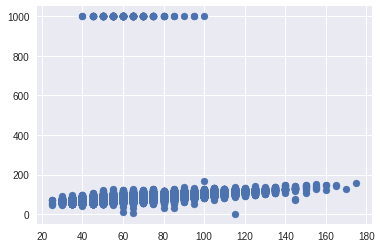

In [36]:
plt.scatter(df8['체중(5Kg단위)'].values, df8['허리둘레'].values)

이제보니 y축인 허리둘레 데이터가 심각하군요... 999 저거 outlier네요.

원래 전처리 과정에서 다 제외하고 분석했어야 됫습니다 그쵸?

이래서 앞에서 그렇게 데이터 정리가 중요하다고 난리를 친겁니다.

패턴을 기반으로 유사도를 계산하고 있는데 이상한 수치가 몇개만이라도 들어가는 순간

그 '패턴'이라는 정의가 확 바뀌어 버리게 됩니다.

저거 때문에 이제까지 했던거 다 수포로 돌아갔네요.. 일단은 여기서는 예제이므로 

그냥 900 넘는 값들은 날리고 진행하겠습니다.

Text(0, 0.5, 'waist(cm)')

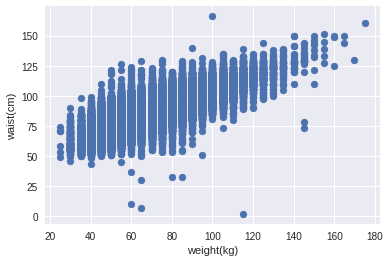

In [39]:
df9 = df8.copy()
df9 = df9[df9['허리둘레'] < 900]
df9 = df9[['체중(5Kg단위)', '허리둘레']]

plt.scatter(df9['체중(5Kg단위)'].values, df9['허리둘레'].values)
plt.xlabel('weight(kg)')
plt.ylabel('waist(cm)')

오.... 둘간의 관계가 대체로 <b>선형적</b>으로 보이는군요.

선형회귀 쓸수 있겠습니다. 이 선형이라는 개념은 뒤에 회귀에서 다시 설명합니다.

선형회귀 실시하겠습니다.(머신러닝이 아니라 전통적인 방법입니다)

LinregressResult(slope=0.6178218796285847, intercept=41.92248772445063, rvalue=0.7950160250814603, pvalue=0.0, stderr=0.0004766403233307499)

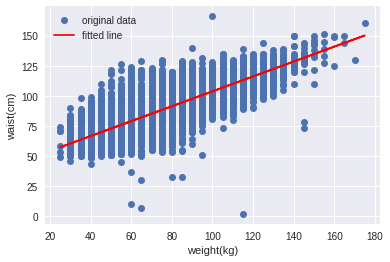

In [40]:
from scipy import stats

xdata = df9['체중(5Kg단위)'].values
ydata = df9['허리둘레'].values

#선형회귀 결과
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata,ydata)
result = stats.linregress(xdata,ydata)


# 시각화
plt.plot(xdata, ydata, 'o', label='original data')
plt.plot(xdata, intercept + slope*xdata, 'r', label='fitted line')
plt.xlabel('weight(kg)')
plt.ylabel('waist(cm)')
plt.legend()
result

이결과는 다음을 의미합니다.

(허리둘레)  = 0.62 * (체중) + 41.92

체중에 따른 허리둘레를 예측하는 모델을 구현했습니다.

위 모델에 따르면 체중이 1kg증가하면 허리둘레는 약 0.62cm 증가합니다.

결과를 더 정확히 볼까요. 실제값과 예측값을 비교해봅시다.

In [41]:
df9.head()

,체중(5Kg단위),허리둘레
0,75.0,86.0
1,65.0,85.0
2,55.0,80.0
3,70.0,85.0
4,50.0,67.0


In [42]:
def lin_reg(x):
  return (x * slope) + intercept

reg_result = lin_reg(df9['체중(5Kg단위)'].values).reshape(-1,1)

df10 = df9.copy()
df10['예측허리둘레'] = reg_result
df10['예측오차(cm)'] = df10['허리둘레'] - df10['예측허리둘레']
df10.head(15)

,체중(5Kg단위),허리둘레,예측허리둘레,예측오차(cm)
0,75.0,86.0,88.259129,-2.259129
1,65.0,85.0,82.080910,2.919090
2,55.0,80.0,75.902691,4.097309
3,70.0,85.0,85.170019,-0.170019
4,50.0,67.0,72.813582,-5.813582
5,55.0,64.0,75.902691,-11.902691
6,70.0,90.0,85.170019,4.829981
7,60.0,81.0,78.991801,2.008199
8,60.0,74.0,78.991801,-4.991801
9,60.0,80.0,78.991801,1.008199


In [43]:
df10.describe()

,체중(5Kg단위),허리둘레,예측허리둘레,예측오차(cm)
count,978098.000000,978098.000000,978098.000000,9.780980e+05
mean,63.236312,80.991265,80.991265,-3.528748e-15
std,12.431444,9.660708,7.680418,5.860074e+00
min,25.000000,2.000000,57.368035,-1.109720e+02
25%,55.000000,74.000000,75.902691,-4.080910e+00
50%,60.000000,81.000000,78.991801,-1.700193e-01
75%,70.000000,87.000000,85.170019,3.829981e+00
max,175.000000,166.000000,150.041317,6.229532e+01


일부 오차는 있으나 단순한 모델임에도 꽤 좋은 결과를 보이고 있습니다.

이럴때 예측오차는 대부분  RMSE라는 수치를 이용하여 판단합니다.

위에 보이는 예측오차의 표준편차 개념입니다. 즉 오차가 얼마나 벌어지는지를 보는거죠

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df10['허리둘레'].values, df10['예측허리둘레'].values))
print('RMSE: ', rms)

RMSE:  5.8600707869732025


# 10. 그래서 뭘 말하고 싶은거냐???

## 1) 보시다시피, 머신러닝이 모든 분석의 필수이자 만능이 아니다

저는 이분석에서 머신러닝을 전혀 쓰지 않았습니다.

데이터 양이 충분하며 분석목적에 맞춰 명확하게 정리한 경우

기초적인 방법론으로도 충분히 좋은 결과를 얻으실수 있습니다.

머신러닝이라는 방법은 정말 필요할때만 골라서 쓰는겁니다. 명심하세요.

## 2) 알고리즘을 먼저 정하는것이 아니라, 요구목적 정의를 먼저 clear하게 해내야 한다.

지금 제가 한 흐름을 보세요.

알고리즘을 먼저 정의했습니까? 아닙니다.

그건 사실상 제일 뒷부분이었어요.

그앞에 데이터 정리(전처리)부분이요. 이걸 어떻게 처리할지에 대한 정답은 없습니다.

데이터에 대한 지식과 다뤄본 경험에 의존할수 밖에 없고요.

예측모델의 정확도는 모델보다는 이 전처리에 따라 더 심각하게 영향 받습니다.

데이터를 어떻게 처리할지는 그때그때 요구조건에 따라 다릅니다. 보시다시피.

<br>

<b>따라서 데이터 분석을 할때 가장먼저 해야할것은 <br> 정확한 요구조건 정의와 이에 따른 데이터(전처리)입니다 </b>

<br>

이점을 명심하시기 바랍니다.